<a href="https://colab.research.google.com/github/zsahnoun/Iris_code/blob/main/Iris_Project_Exam_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The iris project

We use the (famous) **iris flowers dataset**. Each instance describes the properties of an observed flower measurements and the output variable is specific of iris species. The iris flower dataset is a well studied problem and as such one can expect to achieve a model accuracy in the range of 95% to 97%. Which is our target.
Version used is Python3

# Importing the "Iris" dataset
The datatset was downlaoded from the https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv and rearanged

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zsahnoun/Iris_code/5203278096adfe6eb18ebd2ffd8acaf0d8b09170/iris/iris.cvs'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=names)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# First look at the Dataset
In the following, the shape and characteristics of the dataset are examined. Descriptive statistics is performed on the data and the features are plotted against each other to get an idea of how the classes are distributed and whether any are well separated.

In [ ]:
data.shape

(150, 5)

In [ ]:
description = data.describe()
print(description)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
class_counts = data.groupby('class').size()
print(class_counts)

class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


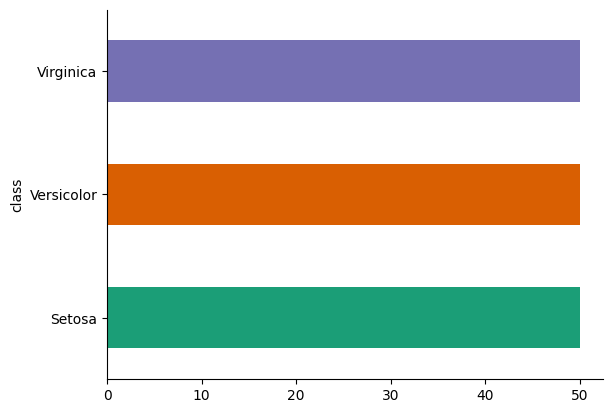

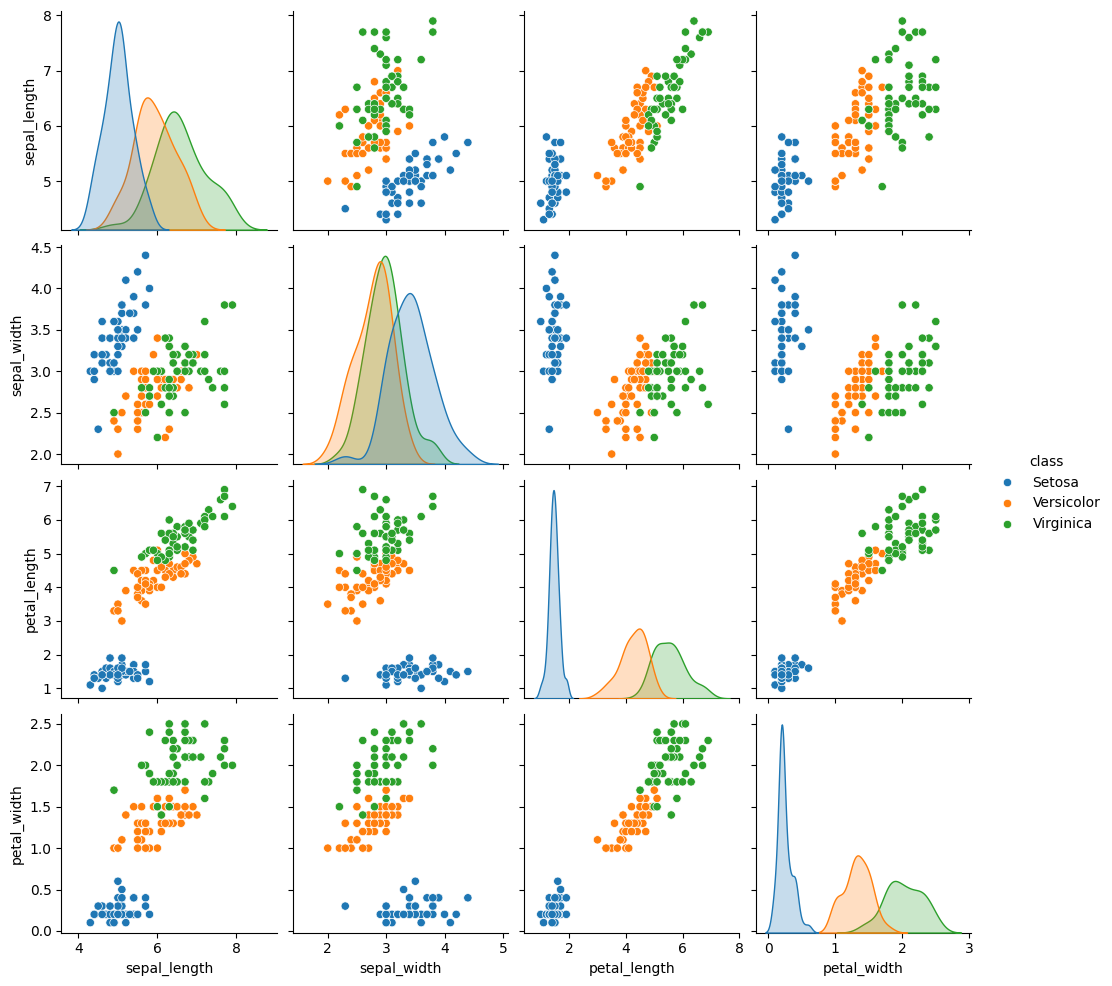

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
sns.pairplot(data, hue='class')

The Dataset is not very large, it contains an equal number of samples from each class. It is clear from the above plots that the Iris class "Setosa" is very well separated from the two other classes. In addition, it seems that petal_length and petal_width are the most significant features.

# Checking for correlations

In [ ]:
from pandas import set_option
set_option('display.width', 100)
correlations = data.corr(method='pearson',numeric_only = True)
correlations

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Note: "petal_length" and "petal_width" are very well correlated. There also exist a correlation of both with "sepal_length", while "sepal_width" is the less/not correlated feature.

# Preparing Data
1- Putting data into an array and separating features from class

In [ ]:
array = data.values
array[:10]

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa']], dtype=object)

In [ ]:
# separate array into features and class
X = array[:,0:4]
Y = array[:,4]

Getting more insight on the important features for a possible selection if needed.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
print(fit.scores_)

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


In [ ]:
names[:-1]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

As intuited from the plots, the most important features are "petal length" and "petal width". Maybe "sepal_length" is also at a lower level.

Remark: No feature is dropped for the moment unless needed to try to improve results.

# Preparing Data
2- Splitting the dataset to "Training dataset" and "Test dataset" (20% dataset). The "Test dataset" is put aside to provide evaluation of a final model fit on the training dataset.
Remark: We choose to use the K-fold Cross-Validation, so the cross-validation dataset is contained (generated randomly) in the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 10

In [ ]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# First Model Evaluated : LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# K-fold Cross-Validation
The value for the number of k groups is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias and modest variance.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

intoducing accuracy score and confusion matrix to evaluate the performance of the model on training dataset.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
%%time
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
# model = LogisticRegression()
model = LogisticRegression(solver='lbfgs', max_iter=300)
predicted = cross_val_predict(model, X_train, Y_train, cv=kfold)

CPU times: user 205 ms, sys: 2.25 ms, total: 207 ms
Wall time: 210 ms


In [ ]:
# Calculate the accuracy
accuracy_score(Y_train, predicted)

0.9666666666666667

In [ ]:
matrix = confusion_matrix(Y_train, predicted)
print(matrix)

[[40  0  0]
 [ 0 34  3]
 [ 0  1 42]]


<Axes: >

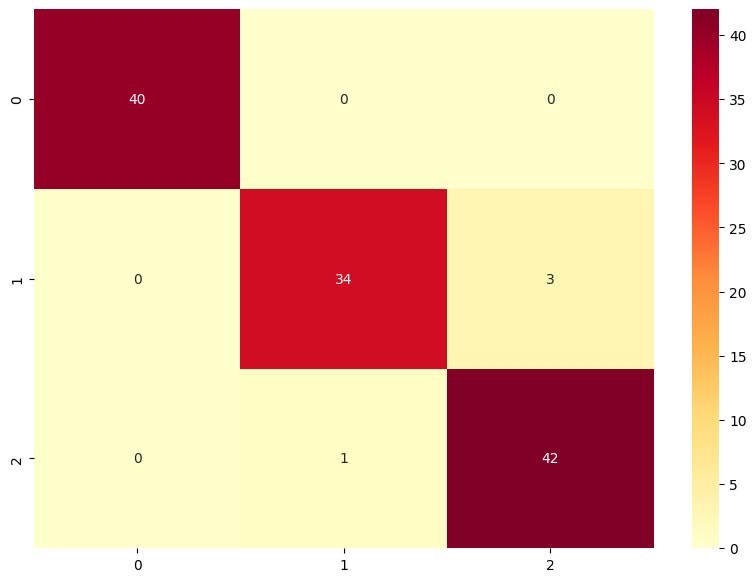

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

In [ ]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_train, predicted))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.97      0.92      0.94        37
   Virginica       0.93      0.98      0.95        43

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



# Evaluating another Model: Support Vector Classification (SVC)

In [ ]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()

In [ ]:
%%time
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

model = svn
prediction = cross_val_predict(model, X_train, Y_train, cv=kfold)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, prediction)

CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 27.7 ms


0.9666666666666667

In [ ]:
matrix1 = confusion_matrix(Y_train, prediction)
print(matrix1)

[[40  0  0]
 [ 0 34  3]
 [ 0  1 42]]


<Axes: >

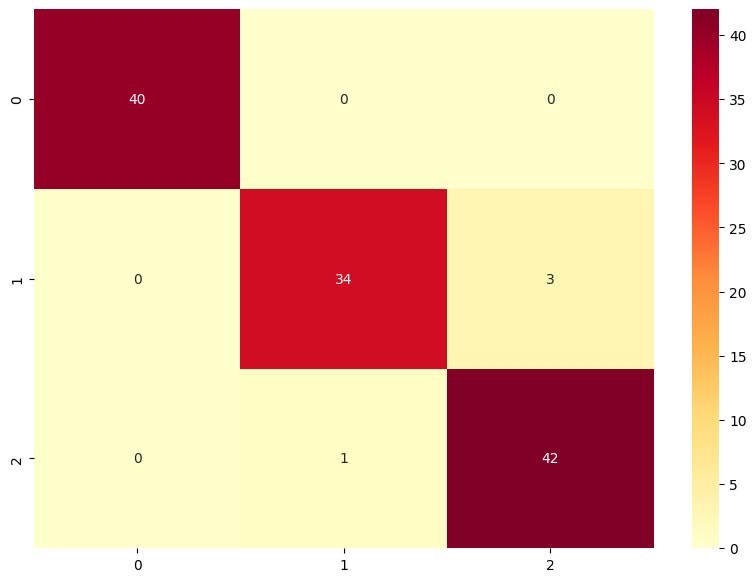

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix1)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

#Discussion:
The LogisticRegression and SVC models give quiet the same results and good accuracy (> 96%) on the training dataset. However the SVC() model is faster. It is the model we choose to train and finally test on the test dataset.

In [ ]:
svn.fit(X_train, Y_train)
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 96.667%


In [ ]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
matrix2 = confusion_matrix(Y_test, predictions)
print(matrix2)

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


<Axes: >

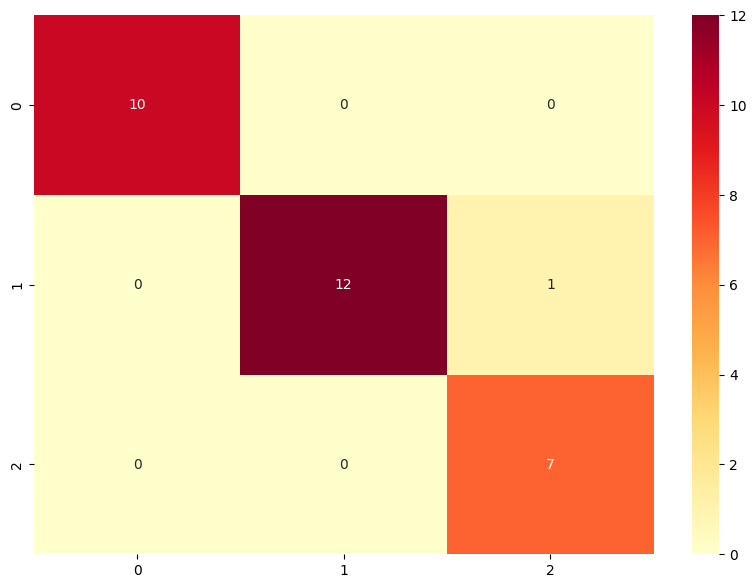

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix2)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

# Conclusions and Final remaks
The Iris Flower dataset was used to evaluate two machine learning algorythms: LogisticRegression and Support Vector Classification. After splitting the dataset into trainning dataset and test dataset, the models were trained using K-fold Cross-Validation. Both models give good results  with an accuracy in recognizing the right class larger than 96%. Yest the SVC model is faster. So, it was used to train and test on the training and test dataset. The final accuracy obtained on the test dataset is found to be 96.667%, within the range expected.
#Remarks
- The choice of the seed is crucial, as for a lower seed than the one used here the accuracy on the K-fold Cross-Validation of the models on the trainning set can be better than 98% while the accuracy on test dataset can drop to less than 90%.
- The fraction of dataset left as test dataset is also important. If larger than 20% the accuracy on the test set can be even better than 97%.
- The small set of data available is probably the reason for the 2 above mentionned remarks.
- One could also decide to train the models using the K-fold Cross-Validation on the total dataset and use it on new data if available.
In this case, the accuracy found using the same parameters would be 0.9666666666666667.

